In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob
import sys
import multiprocessing as mp
sys.path.append('../')  # import를 위해 경로추가
import utils.Utility as U
from tqdm import tqdm

In [6]:
path_ref = '../'
path_train_csv = './data/train_i.csv'
train_df = pd.read_csv(os.path.join(path_ref, path_train_csv))
train_df['ans'] = [U.convertAgeGenderMaskToLabel(m, g, a) for m, g, a in zip(train_df['mask_class'].values,train_df['gender_class'].values,train_df['age_class'].values)]
labels = train_df['ans'].unique()
labels.sort()

train_df.head()

,id,gender,age,mask,path,gender_class,age_class,mask_class,ans
0,0,female,45,Wear,./data/train/images/000001_female_Asian_45/mas...,1,1,0,4
1,0,female,45,NotWear,./data/train/images/000001_female_Asian_45/nor...,1,1,2,16
2,0,female,45,Wear,./data/train/images/000001_female_Asian_45/mas...,1,1,0,4
3,0,female,45,Wear,./data/train/images/000001_female_Asian_45/mas...,1,1,0,4
4,0,female,45,Incorrect,./data/train/images/000001_female_Asian_45/inc...,1,1,1,10


In [12]:
number_of_labels = [(train_df['ans'].values == x).sum() for x in labels]
path_by_labels = [train_df[train_df['ans'] == x]['path'].values.tolist() for x in labels]

Text(0, 0.5, 'Number of image')

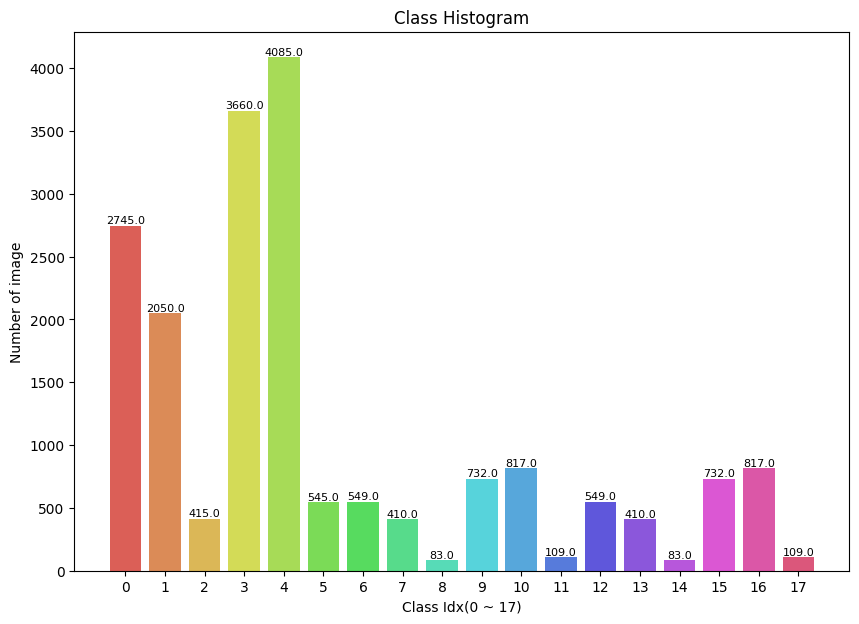

In [13]:
_, ax = plt.subplots(1,1, figsize=(10,7))
colors = sns.color_palette('hls',len(number_of_labels))
ax.bar(labels, number_of_labels, tick_label=[str(l) for l in labels], color=colors)
# 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정
for i in range(len(number_of_labels)):
    height = number_of_labels[i]
    plt.text(labels[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 8)
ax.set_title("Class Histogram")
ax.set_xlabel("Class Idx(0 ~ 17)")
ax.set_ylabel("Number of image")

In [23]:
def get_average_image(path_by_label:list):
    img_ref = cv2.imread(os.path.join(path_ref, path_by_label[0]))
    imgs = np.zeros(img_ref.shape, np.double)
    for path in path_by_label:
        img = cv2.imread(os.path.join(path_ref, path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.array(img, np.double) / 255.
        imgs = np.add(imgs, img) 
    imgs = imgs / len(path_by_label)
    
    return imgs

pool = mp.Pool(mp.cpu_count())
imgs = pool.map(get_average_image, tqdm(path_by_labels))

100%|██████████| 18/18 [00:16<00:00,  1.10it/s]


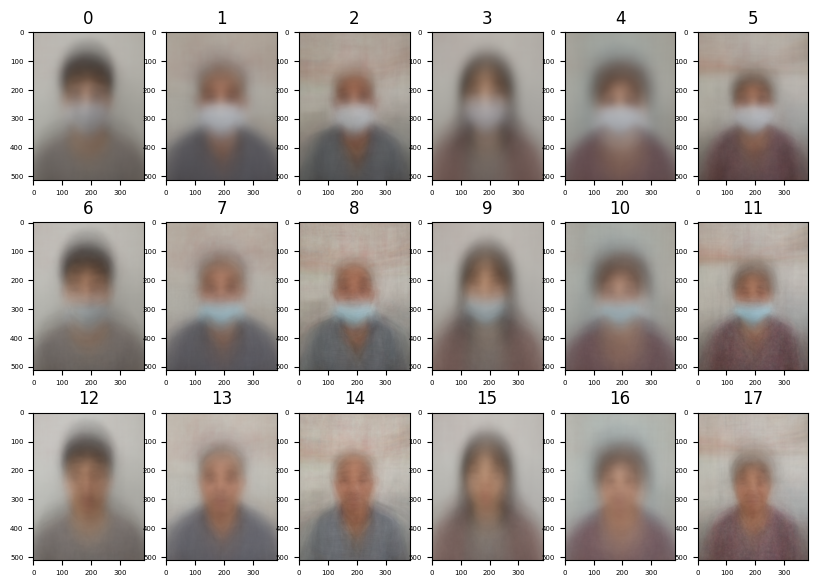

In [31]:
nrows = 3
ncols = 6
_, axs = plt.subplots(nrows, ncols, figsize=(10,7))
for i in range(nrows * ncols):
    col = i % ncols
    row = i // ncols
    # axs[row][col].set_axis_off()
    axs[row][col].imshow(imgs[i])
    axs[row][col].set_title(labels[i])
    axs[row][col].tick_params(axis='both', which='major', labelsize=5)
    axs[row][col].tick_params(axis='both', which='minor', labelsize=4)

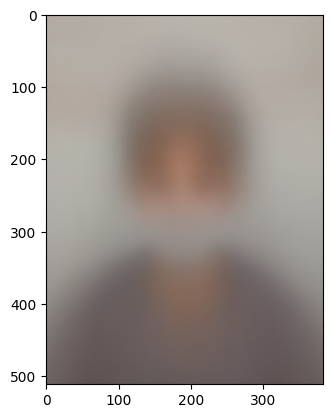

In [28]:
_, ax = plt.subplots(1, 1)
imgs_avg = np.array(imgs)
imgs_avg = np.average(imgs_avg, axis=0)
ax.imshow(imgs_avg)
ax.tick_params(axis='both', which='major', labelsize=5)
ax.tick_params(axis='both', which='minor', labelsize=4)

In [ ]:
nrows = 3
ncols = 6
_, axs = plt.subplots(nrows, ncols, figsize=(10,7))
position_lt = (50,50)
position_br = (350,500)
for i in range(nrows * ncols):
    col = i % ncols
    row = i // ncols
    img_copyed = np.array(imgs[i]*255, np.int32)
    cv2.rectangle(img_copyed, position_lt, position_br, (0,255,0), 2)
    # axs[row][col].set_axis_off()
    axs[row][col].imshow(img_copyed)
    axs[row][col].set_title(labels[i])
    axs[row][col].tick_params(axis='both', which='major', labelsize=5)
    axs[row][col].tick_params(axis='both', which='minor', labelsize=4)